<a href="https://colab.research.google.com/github/sreekumartp/kata/blob/main/Questions_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

#### Change current working directory to project folder. [ Score: 2 points ]

In [4]:
# Changing the CWD
os.chdir('/content/drive/MyDrive/cvprj2/prt2/')

#### Extract the zip file [ Score: 2 points ]
- Extract Aligned Face Dataset from Pinterest.zip

In [5]:
# #### Add your code here #### 
# from zipfile import ZipFile
# # Create a ZipFile Object and load sample.zip in it
# with ZipFile('/content/drive/MyDrive/cvprj2/prt2/Part 3 - Aligned Face Dataset from Pinterest.zip', 'r') as zipObj:
#    # Extract all the contents of zip file in current directory
#    zipObj.extractall('/content/drive/MyDrive/cvprj2/prt2/data')

In [6]:
os.chdir('/content/drive/MyDrive/cvprj2/prt2/data')

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [7]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')


In [8]:
metadata = load_metadata('PINS')

In [9]:
# metadata

### Define function to load image
- Define a function to load image from the metadata

In [10]:
import cv2
def load_image(path):
    img_bgr = cv2.imread(path, 1)
    img = img_bgr
    # img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    return img[...,::-1]

#### Load a sample image [ Score: 2 points ]
- Load one image using the function "load_image"

In [11]:
#### Add your code here ####
imj=load_image('/content/drive/MyDrive/cvprj2/prt2/data/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg')


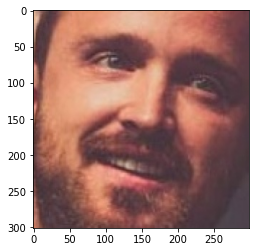

In [12]:
import matplotlib.pyplot as plt
plt.imshow(imj, cmap="Reds")
plt.show()

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model [ Score: 2 points ]
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [14]:
from tensorflow.keras.models import load_model
model = vgg_face()
#### Add your code here ####
model.load_weights('/content/drive/MyDrive/cvprj2/prt2/Part 3 - vgg_face_weights.h5')

### Get vgg_face_descriptor

In [15]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [16]:
# # Get embedding vector for first image in the metadata using the pre-trained model

# img_path = metadata[0].image_path()
# img = load_image(img_path)

# # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
# img = (img / 255.).astype(np.float32)

# img = cv2.resize(img, dsize = (224,224))
# print(img.shape)

# # Obtain embedding vector for an image
# # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

# embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
# print(embedding_vector.shape)

In [17]:
# embedding_vector

#### Generate embeddings for all images  [ Score: 3 points ]
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [18]:
# embeddings = np.zeros((metadata.shape[0], 2622))

# for i, m in enumerate(metadata):
#   #### Add your code here ####

#   img_path = metadata[i].image_path()
#   img = load_image(img_path)

#   # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
#   img = (img / 255.).astype(np.float32)

#   img = cv2.resize(img, dsize = (224,224))
#   embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
#   print(i)
# # np.save('embeddings.npy', embeddings)

In [19]:
  embeddings = np.load('embeddings.npy')

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [20]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

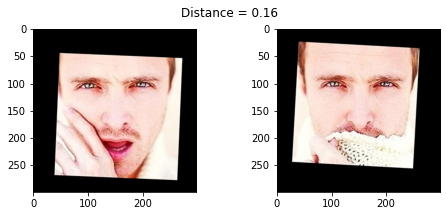

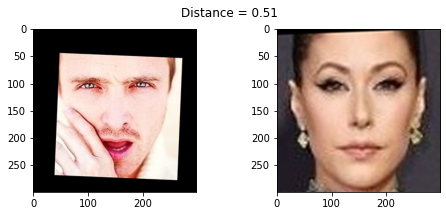

In [21]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

#### Create train and test sets [ Score: 2 points ]
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [67]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]
#### Add your code here ####

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]
#### Add your code here ####

In [102]:
print(metadata.shape)
print(train_idx.size)
print(test_idx.size)
print(y_train.size)

(10770,)
10770
10770
10765


In [69]:
len(targets)

10770

In [70]:
len(y_train)

10765

#### Encode the Labels  [ Score: 2 points ]
- Encode the targets
- Use LabelEncoder

In [71]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####

#### Standardize the feature values [ Score: 2 points ]
- Scale the features using StandardScaler

In [103]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####

le = LabelEncoder()
y_train_encoded = le.fit_transform(targets)

In [73]:
print(len(le.classes_))
y_test_encoded = le.transform(targets)

100


In [74]:
print('y_train_encoded : ', y_train_encoded)
print('y_test_encoded : ', y_test_encoded)
len(y_test_encoded)

y_train_encoded :  [ 0  0  0 ... 99 99 99]
y_test_encoded :  [ 0 24 50 72 97]


5

In [75]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [76]:
X_test_std = scaler.transform(X_test)

## New Section

#### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [77]:
from sklearn.decomposition import PCA

#### Add your code here ####
print('X_train_std shape : ({0},{1})'.format(X_train_std.shape[0], X_train_std.shape[1]))
print('y_train_encoded shape : ({0},)'.format(y_train_encoded.shape[0]))
print('X_test_std shape : ({0},{1})'.format(X_test_std.shape[0], X_test_std.shape[1]))
print('y_test_encoded shape : ({0},)'.format(y_test_encoded.shape[0]))

X_train_std shape : (10765,2622)
y_train_encoded shape : (10765,)
X_test_std shape : (5,2622)
y_test_encoded shape : (5,)


In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=512)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

#### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [79]:
from sklearn.svm import SVC

#### Add your code here ####
from sklearn.svm import SVC

clf = SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [80]:
y_predict = clf.predict(X_test_pca)

In [81]:
print('y_predict : ',y_predict)
print('y_test_encoded : ',y_test_encoded)

y_predict :  [ 0 24 50 72 20]
y_test_encoded :  [ 0 24 50 72 97]


In [82]:
y_predict_encoded = le.inverse_transform(y_predict)

In [83]:
print('y_predict_encoded : ',y_predict_encoded)

y_predict_encoded :  ['pins_Aaron Paul' 'pins_Henry Cavil' 'pins_Ryan Reynolds'
 'pins_david mazouz' 'pins_Emilia Clarke']


In [84]:
print('y_predict shape : ', y_predict.shape)
print('y_test_encoded shape : ', y_test_encoded.shape)

y_predict shape :  (5,)
y_test_encoded shape :  (5,)


In [85]:
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score
# Find the classification accuracy
accuracy_score(y_test_encoded, y_predict)

0.8

#### Test results (2 marks)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

24


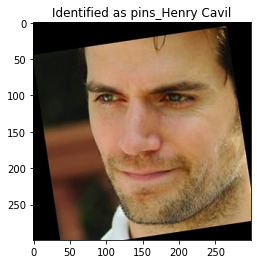

In [87]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 1

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
print(example_prediction)
# example_identity = le.inverse_transform(example_prediction)[0]
example_identity = le.inverse_transform([example_prediction])[0]
plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

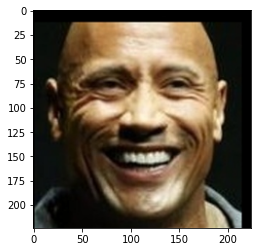

In [93]:
import matplotlib.pyplot as plt
test_img = load_image('/content/drive/MyDrive/cvprj2/Part 2 - Test Image - Dwayne Johnson4.jpg')
# resize the image
test_img = cv2.resize(test_img, dsize = (224,224))
plt.imshow(test_img)


In [94]:
test_img = (test_img / 255.).astype(np.float32)
embedng = vgg_face_descriptor.predict(np.expand_dims(test_img, axis=0))[0]
embedng_scaled=scaler.fit_transform([embedng])
X_testimg_pca = pca.transform(embedng_scaled)
prediction = clf.predict(X_testimg_pca)
example_identity = le.inverse_transform(prediction)[0]
print(example_identity)

pins_miguel herran


In [95]:
prediction[0]

89

In [96]:
# i=0;
# for m in metadata:
#   print(i,m)
#   i=i+1

In [97]:
metadata.shape[0]

10770